# AlBi 3
### Übungsblatt 5
*Markus Apel, Mathias Husted*

## Aufgabe 2 - Likelihood von Baum

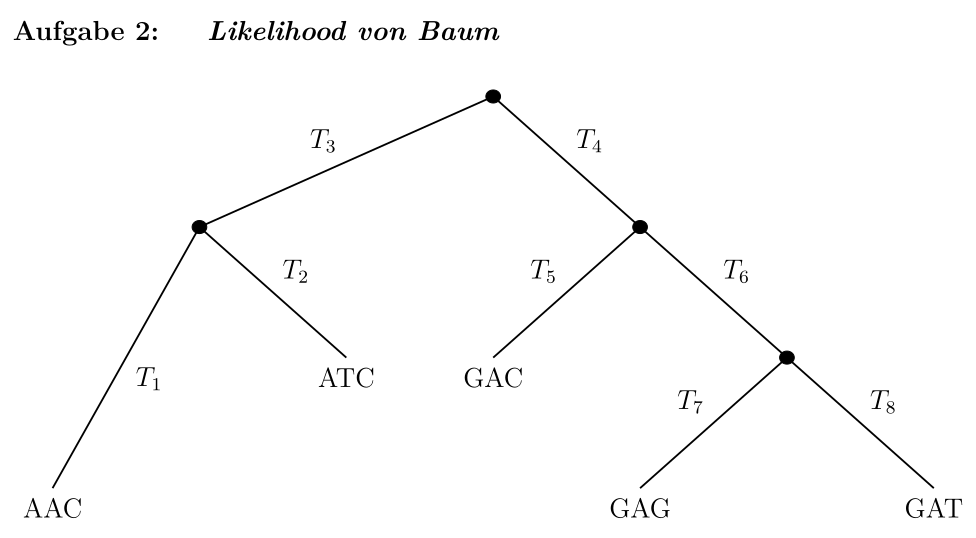

$T_1 = T_3 = T_6 = T_7 = 1$

$T_2 = 0.5$

$T_4 = T_5 = 2$

$T_8 = 3$

Schreiben Sie ein Programm, um die Likelihood dieses Baums unter Verwendung des PEM-kalibrierten Jules-Cantor-Modells zu berechnen.

In [65]:
# First we'll define the tree data structure

class TreeNode:
    def __init__(self, name=None, left=None, right=None, left_weight=None, right_weight=None):
        self.name = name
        self.left = left
        self.right = right
        self.left_weight = left_weight
        self.right_weight = right_weight
    
    def print_tree(self, prefix="", is_tail=True):
        connector = "└── " if is_tail else "├── "
        print(prefix + connector + (self.name if self.name else "Internal Node"))
        
        children = []
        if self.left:
            children.append((self.left, self.left_weight, False))
        if self.right:
            children.append((self.right, self.right_weight, True))
        
        for i, (child, weight, is_last) in enumerate(children):
            extension = "    " if is_tail else "│   "
            weight_str = f" (weight: {weight})" if weight is not None else ""
            print(prefix + extension + ("└── " if is_last else "├── ") + weight_str)
            child.print_tree(prefix + extension + ("    " if is_last else "│   "), True)

weights = [1, 0.5, 1, 2, 2, 1, 1, 3]

leaf_A = TreeNode(name="AAC")
leaf_B = TreeNode(name="ATC")
leaf_C = TreeNode(name="GAC")
leaf_D = TreeNode(name="GAG")
leaf_E = TreeNode(name="GAT")

internal_1 = TreeNode(name=None, left=leaf_A, right=leaf_B, left_weight=weights[0], right_weight=weights[1])
internal_3 = TreeNode(name=None, left=leaf_D, right=leaf_E, left_weight=weights[6], right_weight=weights[7])
internal_2 = TreeNode(name=None, left=leaf_C, right=internal_3, left_weight=weights[4], right_weight=weights[5])

root = TreeNode(name="Root", left=internal_1, right=internal_2, left_weight=weights[2], right_weight=weights[3])

root.print_tree()

└── Root
    ├──  (weight: 1)
    │   └── Internal Node
    │       ├──  (weight: 1)
    │       │   └── AAC
    │       └──  (weight: 0.5)
    │           └── ATC
    └──  (weight: 2)
        └── Internal Node
            ├──  (weight: 2)
            │   └── GAC
            └──  (weight: 1)
                └── Internal Node
                    ├──  (weight: 1)
                    │   └── GAG
                    └──  (weight: 3)
                        └── GAT


## Aufgabe 3- Jukes-Cantor-Modell

a\) Schreiben Sie ein Programm, das die Evolution einer Sequenz über 50 Zeitschritte
unter Verwendung des Jukes-Cantor-Modells mit rate α = 1/50 sampled. Beginnen
Sie mit der Sequenz:

$S_0 = \text{AAAAAAAAAA}.$

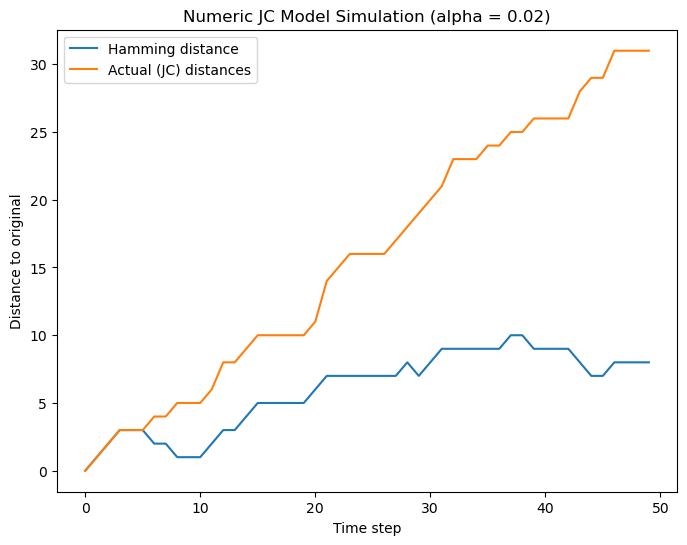

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

alphabet = ["A", "G", "C", "T"]

s_0 = "AAAAAAAAAA"
time_steps = 50
alpha = 1/50

def hamming(s1, s2):
    if len(s1) != len(s2):
        return ValueError()
    
    dist = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            dist += 1
    return dist


def jukes_cantor(sequence, time_steps, alpha):
    L = len(sequence)
    original_sequence = sequence
    hamming_distances = []
    evolved_sequences = []
    actual_distances = []
    
    p_no_mutation = 1/4 + 3/4 * np.exp(-alpha*4) # Chance of no mutation (e.g. A -> A)
    p_mutate = 1/4 - 1/4 * np.exp(-alpha*4) # Chance of mutation to a specific other base (e.g. A -> C)
    p_mutate_total = p_mutate * 3 # Total chance of mutation (e.g. A to {C, T or G})

    for i in range(time_steps):
        old_seq = sequence
        new_seq = list(old_seq)

        for j in range(L):
            uniform = np.random.uniform(0,1)
            if uniform < p_mutate_total:
                new_alphabet = [x for x in alphabet if x != old_seq[j]]
                new_letter = random.choice(new_alphabet)
                new_seq[j] = new_letter

        sequence = "".join(new_seq)
        evolved_sequences.append(sequence)

        # Hamming distance
        h = hamming(sequence, original_sequence)
        hamming_distances.append(h)

        # Actual distances
        if i == 0:
            actual_distances.append(hamming_distances[0])
            continue
        actual_distances.append(actual_distances[i-1] + hamming(sequence, evolved_sequences[i-1]))


    
    plt.figure(figsize=(8,6))
    plt.plot(hamming_distances, label="Hamming distance")
    plt.plot(actual_distances, label="Actual (JC) distances")
    plt.xlabel("Time step")
    plt.ylabel("Distance to original")
    plt.title(f"Numeric JC Model Simulation (alpha = {alpha})")
    plt.legend()
    plt.show()

    return original_sequence, evolved_sequences[time_steps-1]

first_sequence, last_sequence = jukes_cantor(s_0, time_steps, alpha)

b\) Berechnen Sie die Edit-Distance D zwischen der Endsequenz $S_{49}$ und der initialen
Sequenz $S_0$ . Berechnen Sie die Jukes-Cantor-Evolutionsdistanz zwischen diesen beiden
Sequenzen.

In [59]:
print(first_sequence)
print(last_sequence)
print(hamming(first_sequence, last_sequence))

AAAAAAAAAA
TTACTCAGGT
8


In [60]:
def jc_correction(sequence_1, sequence_2):
    if len(sequence_1) != len(sequence_2):
        return ValueError()
    
    n = len(sequence_1)
    u = hamming(first_sequence, last_sequence)
    p = u/n

    if p >= 0.75:
        return np.inf
    
    d = -(3/4) * np.log(1 - (4/3) * p)
    pem = d * n

    return pem

edit_dist = hamming(first_sequence, last_sequence)
jc_dist = jc_correction(first_sequence, last_sequence)

print(f"Edit (Hamming distance): {edit_dist}\nDistance after JC-Correction: {jc_dist}")

Edit (Hamming distance): 8
Distance after JC-Correction: inf


c\) Wiederholen Sie a-b\) mit unterschiedlichen Werten für $\alpha$ und stellen Sie die Korrelation
zwischen $D$ und der Evolutionsdistanz grafisch dar. Was beobachten Sie?

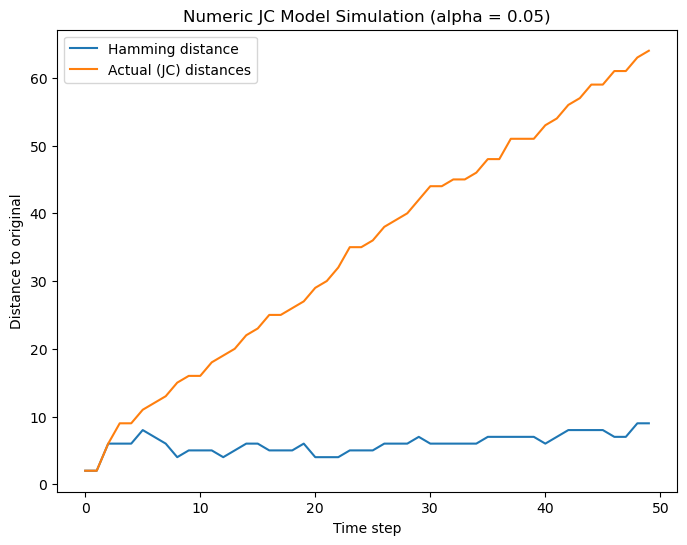

Edit (Hamming distance): 9
Distance after JC-Correction: inf


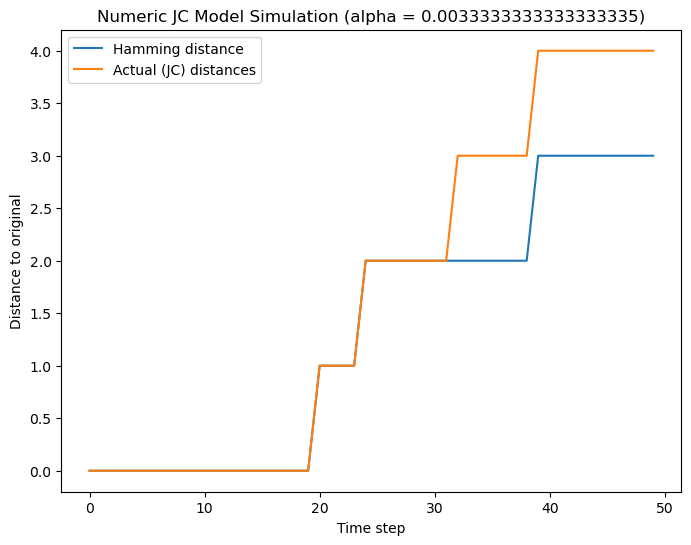

Edit (Hamming distance): 3
Distance after JC-Correction: 3.8311921782449287


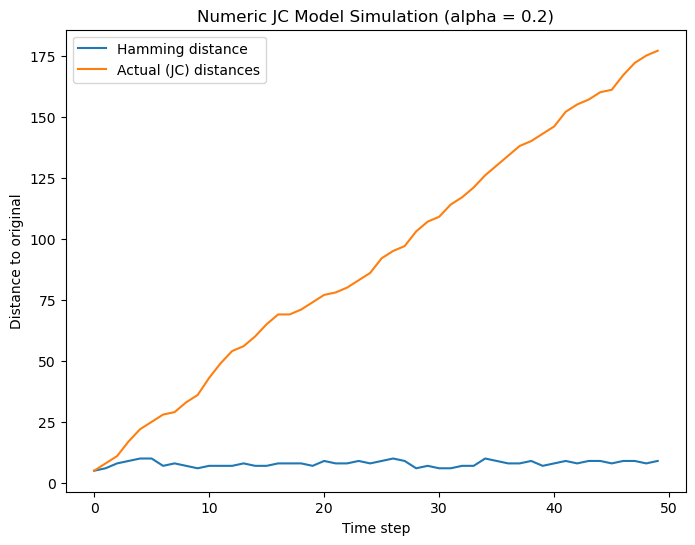

Edit (Hamming distance): 9
Distance after JC-Correction: inf


In [63]:
s_1 = "CACAGGAATT"
s_2 = "GCCAAATCGG"
s_3 = "GGGTTATACC"
alphas = [1/20, 1/300, 1/5]

first_sequence, last_sequence = jukes_cantor(s_1, time_steps, alphas[0])
edit_dist = hamming(first_sequence, last_sequence)
jc_dist = jc_correction(first_sequence, last_sequence)

print(f"Edit (Hamming distance): {edit_dist}\nDistance after JC-Correction: {jc_dist}")

first_sequence, last_sequence = jukes_cantor(s_2, time_steps, alphas[1])
edit_dist = hamming(first_sequence, last_sequence)
jc_dist = jc_correction(first_sequence, last_sequence)

print(f"Edit (Hamming distance): {edit_dist}\nDistance after JC-Correction: {jc_dist}")

first_sequence, last_sequence = jukes_cantor(s_3, time_steps, alphas[2])
edit_dist = hamming(first_sequence, last_sequence)
jc_dist = jc_correction(first_sequence, last_sequence)

print(f"Edit (Hamming distance): {edit_dist}\nDistance after JC-Correction: {jc_dist}")


Mit größer werdenem $\alpha$ steigt die Evolutionsdistanz schneller an, da im Schnitt mehr Mutationen hervorgerufen werden. Außerdem ist die Beziehung nicht linear, da die Edit-Distanz ungefähr proportional zu der Anzahl an Basen ist. Die JC-korrigierte Distanz wächst allerdings logarithmisch an.